# Elecciones USA 2020

## Datasets

### Cargar características socioeconómicas y demográficas

In [333]:
from tabulate import tabulate
import pandas as pd

# Cargar datos
all_data = pd.read_csv("data/county_complete.csv", header=0, sep=",")

# Seleccionar las primeras tres columnas y las columnas que contienen "2019"
all_data = all_data.iloc[:, [0, 1, 2]].join(all_data.loc[:, all_data.columns.str.contains("2019")])

# Renombrar la tercera columna
all_data.columns.values[2] = "county"

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(all_data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(all_data))

╒════╤════════╤═════════╤════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤══════════════════════════════╤════════════╤════════════════╤═══════

### Cargar los resultados electorales

In [334]:
# Cargar datos
d1 = pd.read_csv("data/2020_US_County_Level_Presidential_Results.csv")

# Crear nueva columna 'votes_others'
d1['votes_others'] = d1['total_votes'] - (d1['votes_gop'] + d1['votes_dem'])

# Crear nueva columna 'perc votes_others'
d1['perc votes_others'] = d1['votes_others'] / d1['total_votes']

# Quedarse con columnas específicas
d1 = d1[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes', 'votes_others', 'perc votes_others', 'per_dem', 'per_gop']]

# Renombrar columnas
d1.columns = ["state", "fips", "county", "Trump_2020", "Biden_2020", "Total_2020", "Other_2020", "Perc_Other_2020", "Perc_Biden_2020", "Perc_Trump_2020"]

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(d1.head(), headers='keys', tablefmt='fancy_grid'))
print(len(d1))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤═══════════════════╕
│    │ state   │   fips │ county         │   Trump_2020 │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Other_2020 │   Perc_Biden_2020 │   Perc_Trump_2020 │
╞════╪═════════╪════════╪════════════════╪══════════════╪══════════════╪══════════════╪══════════════╪═══════════════════╪═══════════════════╪═══════════════════╡
│  0 │ Alabama │   1001 │ Autauga County │        19838 │         7503 │        27770 │          429 │        0.0154483  │         0.270184  │          0.714368 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┼───────────────────┤
│  1 │ Alabama │   1003 │ Baldwin County │        83544 │        24578 │       109679 │         1557 │        0.014196   │         0.22409   │          0.761714 │
├────┼─────────┼──────

### Unir dataset final

In [335]:
# Unir los dos datasets
data = pd.merge(d1, all_data, how='inner', on=["state", "county", "fips"])

# Ensure FIPS codes are strings with 5 characters (padded with leading zeros)
data['fips'] = data['fips'].astype(str).str.zfill(5)


# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(data))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤═══════════════════

## Preprocesado

### Convertir variables categóricas en vectores

In [336]:
# Guardamos las variables en vectores para uso futuro
state_names = data['state']
fips_codes = data['fips']
county_names = data['county']

# Crear df para guardarlos
df_vectors = pd.DataFrame({
    'state': state_names,
    'fips': fips_codes,
    'county': county_names
})

# Guardar en archivo CSV
df_vectors.to_csv('data/state_fips_county.csv', index=False)


### Calcular el ganador en cada county

In [337]:
data['Winner_2020'] = data['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

### Eliminar columnas

In [338]:
columns_to_drop = ['state', 'fips', 'county', 'Trump_2020', 'Perc_Trump_2020', 'age_over_85_2019', 'age_under_5_2019', 'households_2019', 'households_speak_asian_or_pac_isl_2019', 'households_speak_other_2019', 'households_speak_other_indo_euro_lang_2019', 'households_speak_spanish_2019', 'household_has_broadband_2019', 'household_has_smartphone_2019', 'household_has_computer_2019', 'housing_mobile_homes_2019', 'housing_one_unit_structures_2019', 'housing_two_unit_structures_2019', 'mean_household_income_2019', 'mean_work_travel_2019', 'median_household_income_2019', 'median_individual_income_2019', 'median_individual_income_age_25plus_2019', 'persons_per_household_2019', 'poverty_65_and_over_2019', 'poverty_under_18_2019', 'uninsured_65_and_older_2019', 'uninsured_under_19_2019', 'uninsured_under_6_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Missing values

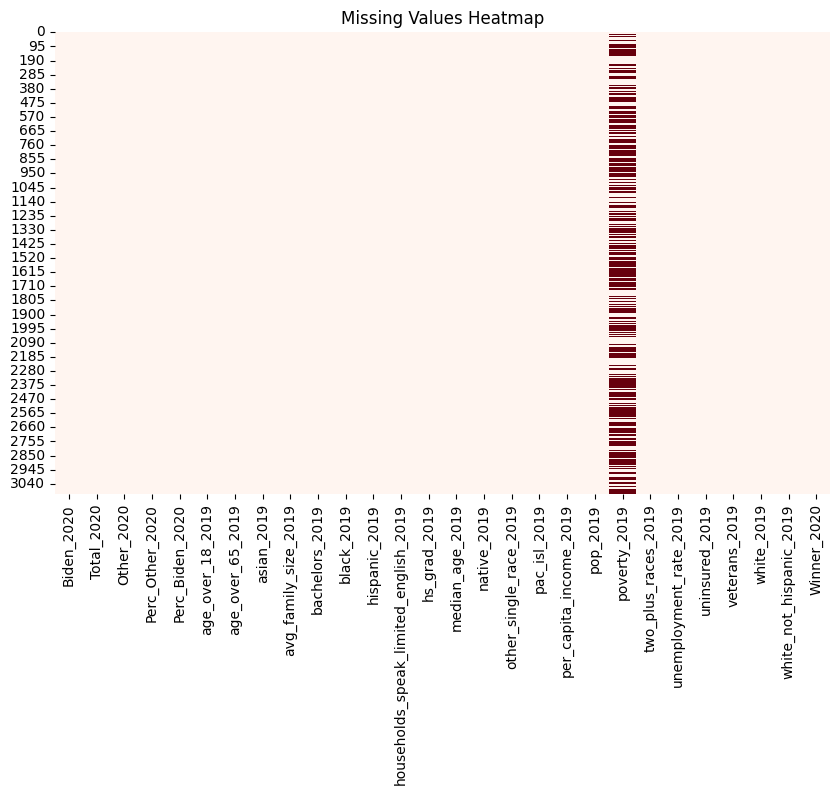

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="Reds")

plt.title("Missing Values Heatmap")
plt.show()

### Eliminar columnas 2

In [340]:
columns_to_drop = ['poverty_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Tabla Final

In [341]:
data.to_csv("data/final_data.csv")
data

,Biden_2020,Total_2020,Other_2020,Perc_Other_2020,Perc_Biden_2020,age_over_18_2019,age_over_65_2019,asian_2019,avg_family_size_2019,bachelors_2019,...,pac_isl_2019,per_capita_income_2019,pop_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019,Winner_2020
0,7503,27770,429,0.015448,0.270184,76.2,15.0,1.0,3.09,26.6,...,0.0,29819,55380,2.2,3.5,7.1,12.6,76.8,74.6,Trump
1,24578,109679,1557,0.014196,0.224090,78.3,20.0,0.9,3.24,31.9,...,0.0,32626,212830,1.7,4.0,8.9,11.8,86.2,83.1,Trump
2,4816,10518,80,0.007606,0.457882,79.1,18.6,0.5,3.01,11.6,...,0.0,18473,25361,1.2,9.4,11.3,6.6,46.8,45.8,Trump
3,1986,9595,84,0.008755,0.206983,79.4,15.9,0.1,3.74,10.4,...,0.0,20778,22493,0.6,7.0,10.7,8.0,76.8,74.5,Trump
4,2640,27588,237,0.008591,0.095694,76.8,17.9,0.4,3.33,13.1,...,0.0,24747,57681,1.6,3.1,10.8,7.7,95.5,86.9,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3823,16603,551,0.033187,0.230260,73.5,11.4,0.8,3.32,22.5,...,0.0,32603,43521,2.3,5.7,11.3,8.6,93.4,79.6,Trump
3107,9848,14677,488,0.033249,0.670982,80.9,14.0,1.3,3.01,57.0,...,0.1,54051,23280,0.7,0.7,12.7,5.3,89.3,81.3,Biden
3108,1591,9402,315,0.033504,0.169219,70.8,13.0,0.2,3.23,16.0,...,0.0,28159,20479,3.5,5.5,11.2,7.4,93.4,87.5,Trump
3109,651,4012,116,0.028913,0.162263,75.4,21.1,0.0,2.89,23.4,...,0.0,28101,8027,3.8,4.1,15.0,11.9,89.7,81.9,Trump


### Correlación

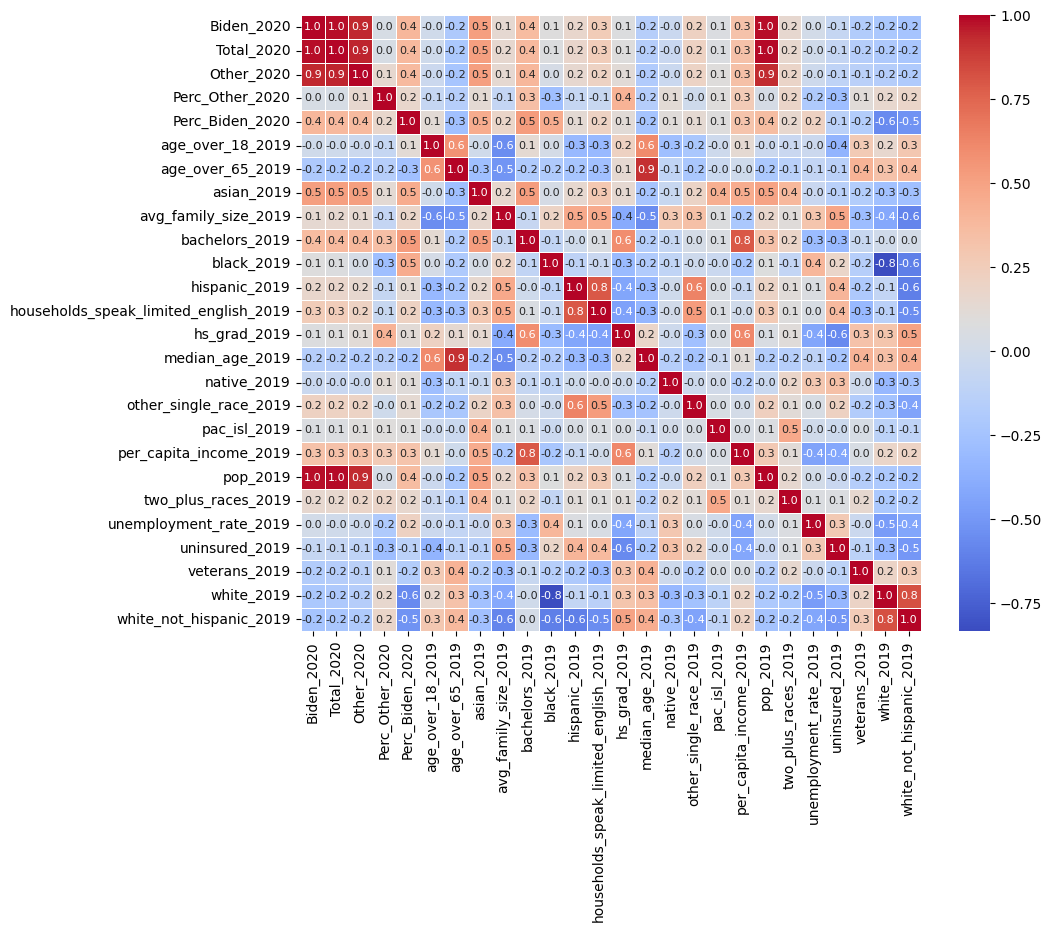

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación sin la variable "Winner_2020"
corr_matrix = data.iloc[:, :-1].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 8})

# Mostrar el gráfico
plt.show()


## Aprendizaje No Supervisado

### Dataset

In [343]:
columns_to_drop = ['Winner_2020']  # Nombres de las columnas a eliminar
data_unsupervised = data.drop(columns=columns_to_drop)

### PCA

### Clustering

#### KMeans

## Aprendizaje Supervisado

En esta sección, utilizaremos métodos de aprendizaje supervisado para abordar nuestros problemas de clasificación y regresión. Para la clasificación, aplicaremos Árboles de Decisión, Random Forest, KNN, LDA/QDA, y Naive Bayes, comparando su desempeño. En regresión, emplearemos Regresión Lineal y Regresión Logística, con enfoques de selección de variables hacia adelante y hacia atrás, evaluando la eficacia de cada método en función del problema a resolver.

### Clasificación

#### Dataset

In [344]:
columns_to_drop = ['Biden_2020', 'Total_2020', 'Other_2020', 'Perc_Biden_2020']  # Nombres de las columnas a eliminar
data_class = data.drop(columns=columns_to_drop)

#### Data Splitting

In [345]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Biden_2020') del conjunto de datos
X = data_class.drop(columns=["Winner_2020"])  # Características (sin la columna objetivo)
y = data_class["Winner_2020"]  # Columna objetivo

# Dividir los datos en 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Benchmark Model

Winner_2020
Trump    0.838316
Biden    0.161684
Name: proportion, dtype: float64


C:\Users\jorge\AppData\Local\Temp\ipykernel_34656\2093265746.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




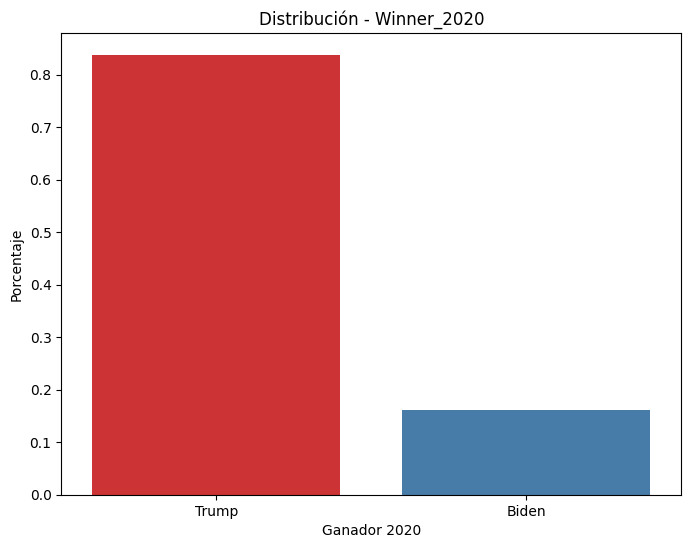

In [346]:
# Obtener la distribución de las etiquetas en porcentaje
label_distribution_percentage = data_class["Winner_2020"].value_counts(normalize=True)

# Imprimir la distribución en porcentaje
print(label_distribution_percentage)

# Graficar la distribución de las etiquetas en porcentaje
plt.figure(figsize=(8, 6))
sns.barplot(x=label_distribution_percentage.index, y=label_distribution_percentage.values, palette=["#e41a1c","#377eb8"])

# Añadir título y etiquetas
plt.title("Distribución - Winner_2020")
plt.xlabel("Ganador 2020")
plt.ylabel("Porcentaje")

# Mostrar el gráfico
plt.show()

#### Decision Trees

In [347]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los hiperparámetros que quieres probar en el modelo
param_grid = {
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'criterion': ['gini', 'entropy'],  # Función de evaluación (índice Gini o Entropía)
    'splitter': ['best', 'random']  # Estrategia para elegir los splits
}

# Crear el modelo de Decision Tree
clf = DecisionTreeClassifier(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_clf = random_search.best_estimator_

# Predecir en el conjunto de prueba
y_test_clf_pred = best_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_test_clf_pred)
print(f"Exactitud en el conjunto de prueba: {test_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_clf_pred))


Mejores parámetros: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'gini'}
Exactitud en el conjunto de prueba: 0.9085072231139647

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.86      0.64      0.73       121
       Trump       0.92      0.97      0.94       502

    accuracy                           0.91       623
   macro avg       0.89      0.81      0.84       623
weighted avg       0.91      0.91      0.90       623



##### Gráficos

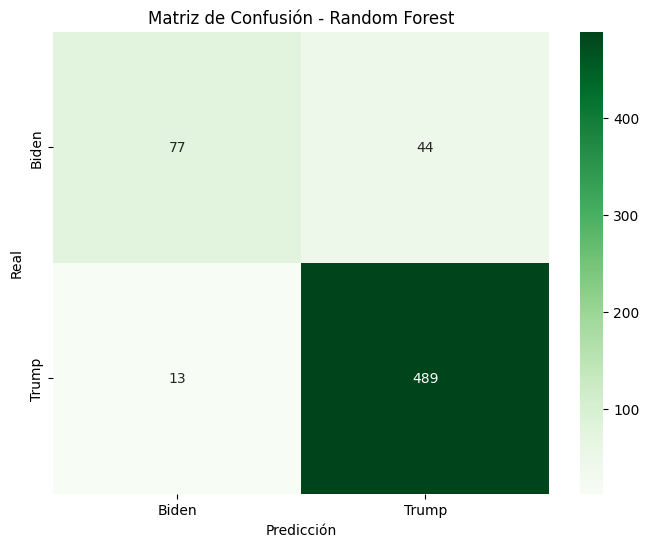

In [348]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_clf_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

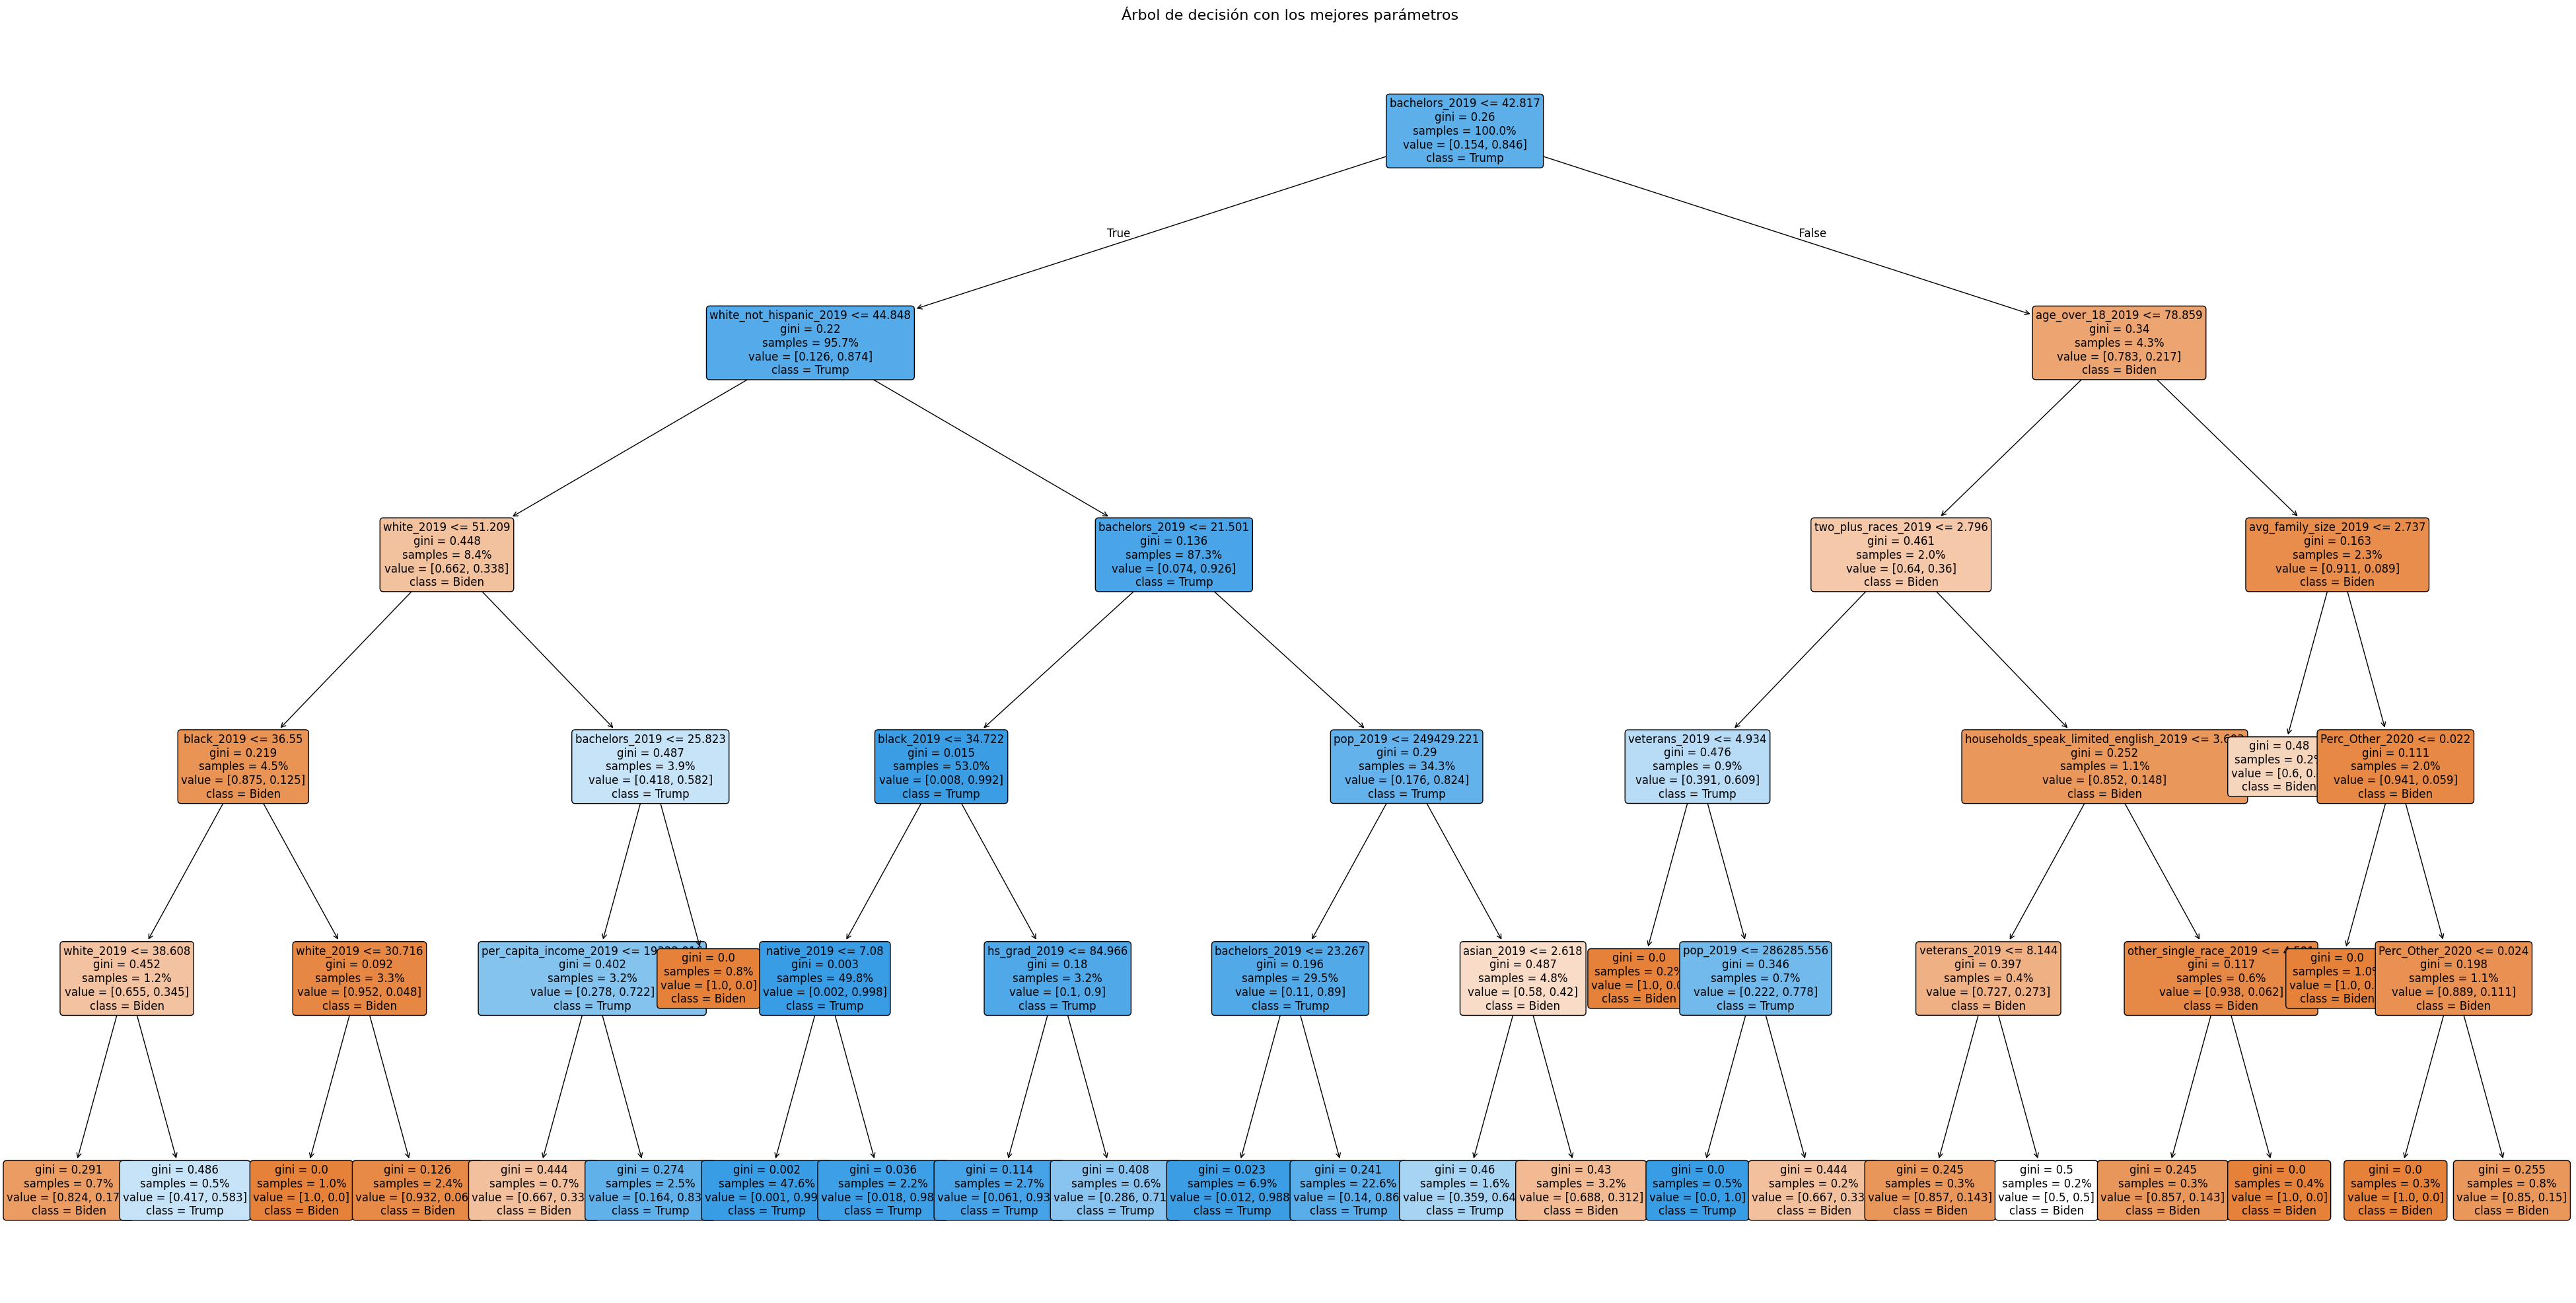

In [349]:
from sklearn import tree

# Ajustar el tamaño del gráfico para visualizar bien el árbol
plt.figure(figsize=(50, 25))

# Visualizar el árbol de decisión con los mejores parámetros
tree.plot_tree(
    best_clf, 
    feature_names=X.columns, 
    class_names=[str(cls) for cls in best_clf.classes_],  # Convertir las clases a string si son enteros
    filled=True,   # Rellenar los nodos con colores basados en la clase
    rounded=True,  # Nodos con bordes redondeados
    fontsize=12,   # Tamaño de fuente
    proportion=True  # Escalar los nodos en proporción al número de muestras
)

# Añadir un título al gráfico
plt.title("Árbol de decisión con los mejores parámetros", fontsize=16)

# Mostrar el gráfico
plt.show()


#### Random Forest

In [350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir los hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [3, 5, 10, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras en una hoja
    'criterion': ['gini', 'entropy'],  # Función de evaluación (índice Gini o Entropía)
    'bootstrap': [True, False]  # Si se utiliza bootstrap para muestreo
}

# Crear el modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_rf = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_rf.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_rf.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_rf_clf = random_search_rf.best_estimator_

# Predecir en el conjunto de prueba
y_test_rf_pred = best_rf_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_rf_accuracy = accuracy_score(y_test, y_test_rf_pred)
print(f"Exactitud en el conjunto de prueba: {test_rf_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_rf_pred))


Mejores parámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini', 'bootstrap': False}
Exactitud en el conjunto de prueba: 0.9406099518459069

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.90      0.78      0.84       121
       Trump       0.95      0.98      0.96       502

    accuracy                           0.94       623
   macro avg       0.93      0.88      0.90       623
weighted avg       0.94      0.94      0.94       623



##### Gráficos

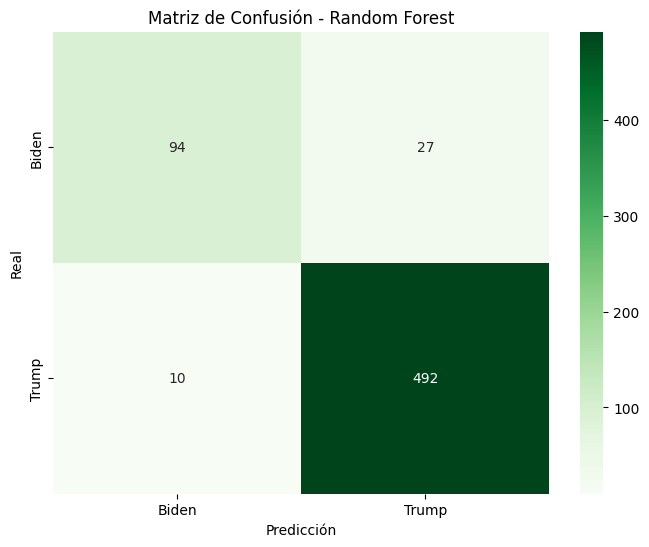

In [351]:
# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_rf_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=best_rf_clf.classes_, yticklabels=best_rf_clf.classes_)
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### KNN

In [352]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los hiperparámetros para KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métricas de distancia
}

# Crear el modelo de KNN
knn_clf = KNeighborsClassifier()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_knn = RandomizedSearchCV(estimator=knn_clf, param_distributions=param_grid_knn, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_knn.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_knn.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_knn_clf = random_search_knn.best_estimator_

# Predecir en el conjunto de prueba
y_test_knn_pred = best_knn_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_knn_accuracy = accuracy_score(y_test, y_test_knn_pred)
print(f"Exactitud en el conjunto de prueba: {test_knn_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_knn_pred))


c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.



Mejores parámetros: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Exactitud en el conjunto de prueba: 0.8314606741573034

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.61      0.36      0.46       121
       Trump       0.86      0.94      0.90       502

    accuracy                           0.83       623
   macro avg       0.74      0.65      0.68       623
weighted avg       0.81      0.83      0.81       623



##### Gráficos

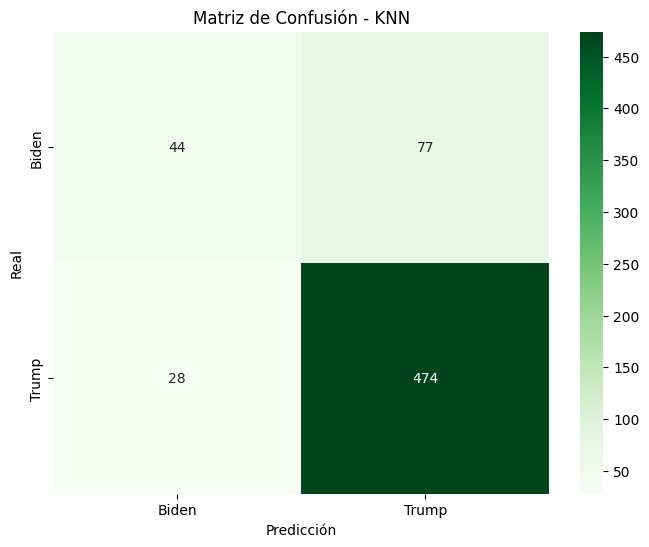

In [353]:
# Generar la matriz de confusión
conf_matrix_knn = confusion_matrix(y_test, y_test_knn_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens', xticklabels=best_knn_clf.classes_, yticklabels=best_knn_clf.classes_)
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Análisis Discriminante

In [354]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el número de clases menos uno
n_classes = len(y_train.unique())
max_components = min(X_train.shape[1], n_classes - 1)

# Definir los hiperparámetros para LDA
param_grid_lda = {
    'solver': ['lsqr', 'eigen'],  # Algoritmos de solución (evitamos 'svd' ya que no admite shrinkage)
    'shrinkage': [None, 'auto'],  # Regularización por shrinkage
    'n_components': [None] + list(range(1, max_components + 1))  # Número de componentes a mantener
}

# Crear el modelo de LDA (Linear Discriminant Analysis)
lda_clf = LinearDiscriminantAnalysis()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_lda = RandomizedSearchCV(estimator=lda_clf, param_distributions=param_grid_lda, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_lda.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_lda.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_lda_clf = random_search_lda.best_estimator_

# Predecir en el conjunto de prueba
y_test_lda_pred = best_lda_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_lda_accuracy = accuracy_score(y_test, y_test_lda_pred)
print(f"Exactitud en el conjunto de prueba: {test_lda_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_lda_pred))

c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.



Mejores parámetros: {'solver': 'lsqr', 'shrinkage': None, 'n_components': None}
Exactitud en el conjunto de prueba: 0.913322632423756

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.86      0.66      0.75       121
       Trump       0.92      0.97      0.95       502

    accuracy                           0.91       623
   macro avg       0.89      0.82      0.85       623
weighted avg       0.91      0.91      0.91       623



##### Gráficos

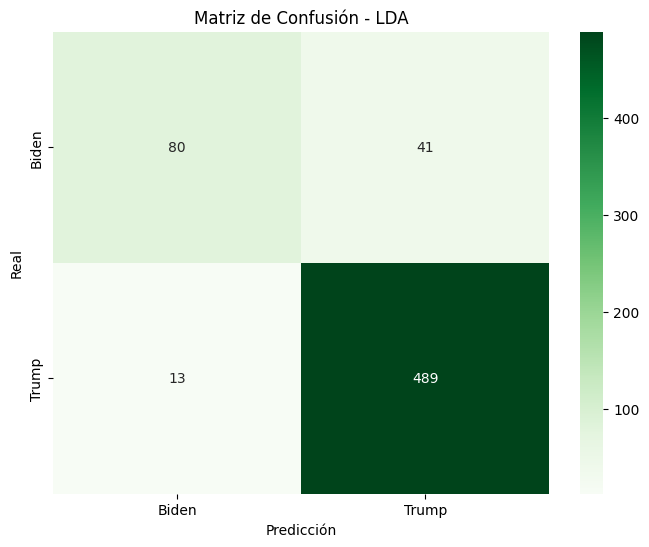

In [355]:
# Generar la matriz de confusión
conf_matrix_lda = confusion_matrix(y_test, y_test_lda_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Greens', xticklabels=best_lda_clf.classes_, yticklabels=best_lda_clf.classes_)
plt.title('Matriz de Confusión - LDA')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Naïve Bayes

In [356]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# No hay muchos hiperparámetros ajustables para GaussianNB, solo 'var_smoothing'
param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Ajuste de varianza para la estabilidad numérica
}

# Crear el modelo de Gaussian Naive Bayes
nb_clf = GaussianNB()

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_nb = RandomizedSearchCV(estimator=nb_clf, param_distributions=param_grid_nb, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_nb.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_nb.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_nb_clf = random_search_nb.best_estimator_

# Predecir en el conjunto de prueba
y_test_nb_pred = best_nb_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_nb_accuracy = accuracy_score(y_test, y_test_nb_pred)
print(f"Exactitud en el conjunto de prueba: {test_nb_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_nb_pred))

Mejores parámetros: {'var_smoothing': 1e-09}
Exactitud en el conjunto de prueba: 0.8860353130016051

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.75      0.63      0.68       121
       Trump       0.91      0.95      0.93       502

    accuracy                           0.89       623
   macro avg       0.83      0.79      0.81       623
weighted avg       0.88      0.89      0.88       623



c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning:

The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.



##### Gráficos

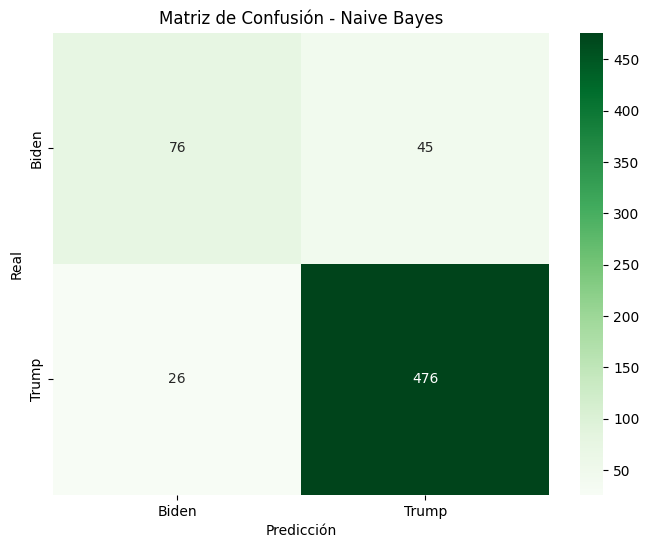

In [357]:
# Generar la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_test_nb_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Greens', xticklabels=best_nb_clf.classes_, yticklabels=best_nb_clf.classes_)
plt.title('Matriz de Confusión - Naive Bayes')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


#### Logistic Regression

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir los hiperparámetros para Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Tipos de regularización
    'C': [0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
    'solver': ['liblinear', 'saga'],  # Solvers compatibles con regularización l1, l2, elasticnet
    'l1_ratio': [0.1, 0.5, 0.7],  # Se usa solo cuando penalty es elasticnet
    'max_iter': [100, 200, 500]  # Número máximo de iteraciones
}

# Crear el modelo de Logistic Regression
lr_clf = LogisticRegression(random_state=42)

# Crear el RandomizedSearchCV con validación cruzada (5 folds)
random_search_lr = RandomizedSearchCV(estimator=lr_clf, param_distributions=param_grid_lr, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

# Entrenar el RandomizedSearchCV para encontrar los mejores parámetros
random_search_lr.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {random_search_lr.best_params_}")

# Entrenar el modelo final con los mejores parámetros
best_lr_clf = random_search_lr.best_estimator_

# Predecir en el conjunto de prueba
y_test_lr_pred = best_lr_clf.predict(X_test)

# Evaluar el rendimiento en el conjunto de prueba
test_lr_accuracy = accuracy_score(y_test, y_test_lr_pred)
print(f"Exactitud en el conjunto de prueba: {test_lr_accuracy}")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación en el conjunto de prueba:")
print(classification_report(y_test, y_test_lr_pred))

Mejores parámetros: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 500, 'l1_ratio': 0.7, 'C': 100}
Exactitud en el conjunto de prueba: 0.913322632423756

Reporte de clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

       Biden       0.85      0.68      0.75       121
       Trump       0.93      0.97      0.95       502

    accuracy                           0.91       623
   macro avg       0.89      0.82      0.85       623
weighted avg       0.91      0.91      0.91       623



c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jorge\Desktop\UNI\MASTER\SC1\MÉTODOS PROB\PROJECT\elections_usa_2020\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, 

##### Gráficos

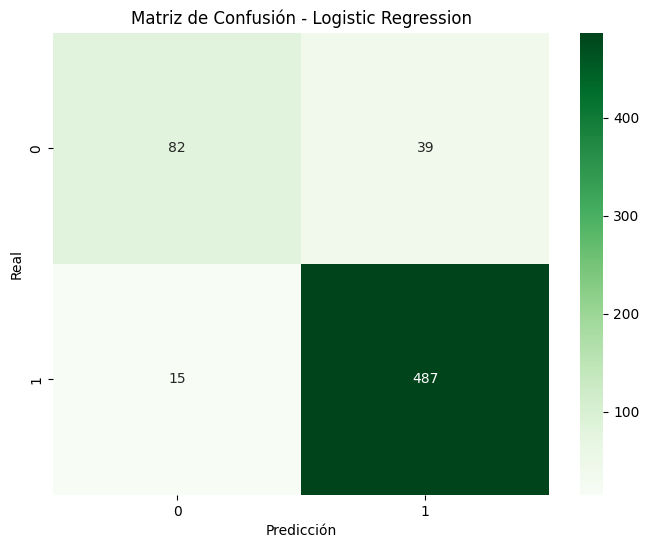

In [359]:
# Generar la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_test_lr_pred)

# Visualizar la matriz de confusión con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Logistic Regression')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

#### Resultados

##### Train

- Mapa con los datos de entrenamiento

In [360]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame
train_df = pd.DataFrame({
    'fips': fips_codes[X_train.index],
    'county': county_names[X_train.index], 
    'real': y_train 
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
train_df['color'] = train_df['real'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=train_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='real',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'real': 'Real'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Datos de entrenamiento",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


##### Test

- Mapa con las predicciones

In [361]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame con las predicciones y el FIPS
predicciones_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'predicciones': y_test_rf_pred  # Predicciones del modelo de Logistic Regression
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
predicciones_df['color'] = predicciones_df['predicciones'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=predicciones_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='predicciones',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'predicciones': 'Predicciones'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Predicciones del modelo - Random Forest",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


- Mapa con datos reales

In [362]:
import plotly.express as px
import pandas as pd


# Crear un nuevo DataFrame con las predicciones y el FIPS
real_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'real': y_test  # Predicciones del modelo de Logistic Regression
})

# Añadir una columna de colores: ["#e41a1c","#377eb8"] si predicciones es "Biden"
real_df['color'] = real_df['real'].apply(lambda x: "#377eb8" if x == "Trump" else "#e41a1c")



# Crear un mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=real_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='real',
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden": "#377eb8",
                        "Trump": "#e41a1c"
                    }, 
                    labels={'real': 'Real'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Datos reales",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


- Comparativa Predicción vs Real

In [363]:
import plotly.express as px
import pandas as pd

# Crear un nuevo DataFrame con las predicciones, valores reales y FIPS
comparacion_df = pd.DataFrame({
    'fips': fips_codes[X_test.index],  # Filtrar los FIPS usando los mismos índices que 'X_test'
    'county': county_names[X_test.index],  # Filtrar los county_names usando los mismos índices que 'X_test'
    'predicciones': y_test_rf_pred,  # Predicciones del modelo de Logistic Regression
    'real': y_test  # Valores reales
})

# Añadir una columna de etiquetas:
# "Biden_correcto", "Trump_correcto" o "Error" según las comparaciones
comparacion_df['resultado'] = comparacion_df.apply(
    lambda row: "Biden Correcto" if row['predicciones'] == "Biden" and row['real'] == "Biden"
                else "Trump Correcto" if row['predicciones'] == "Trump" and row['real'] == "Trump"
                else "Error",  # Etiqueta para las diferencias
    axis=1
)

# Crear el mapa coroplético (choropleth) usando Plotly Express
fig = px.choropleth(data_frame=comparacion_df,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='resultado',  # Usar las etiquetas para colorear
                    hover_name='county',  
                    scope='usa',
                    color_discrete_map={
                        "Biden Correcto": "#377eb8",  # Azul para predicción correcta de Biden
                        "Trump Correcto": "#e41a1c",  # Rojo para predicción correcta de Trump
                        "Error": "#b6b164"  # Dorado para errores de predicción
                    }, 
                    labels={'resultado': 'Comparación'}  # Etiqueta para la barra de colores
                   )

# Añadir título y configuración geográfica
fig.update_layout(title_text="Comparación de Predicciones vs Datos Reales - Random Forest",
                  title_x=0.5,  # Centrar el título
                  geo=dict(
                      showcoastlines=True,  # Mostrar las líneas de costa
                      coastlinecolor="Black"  # Color de las líneas de costa
                  ))

# Ajustar la visualización geográfica
fig.update_geos(fitbounds="locations")  # Ajustar el mapa según las ubicaciones FIPS

# Quitar las líneas divisorias entre los condados
fig.update_traces(marker_line_width=0.5, marker_line_color="black")

# Mostrar el gráfico
fig.show()


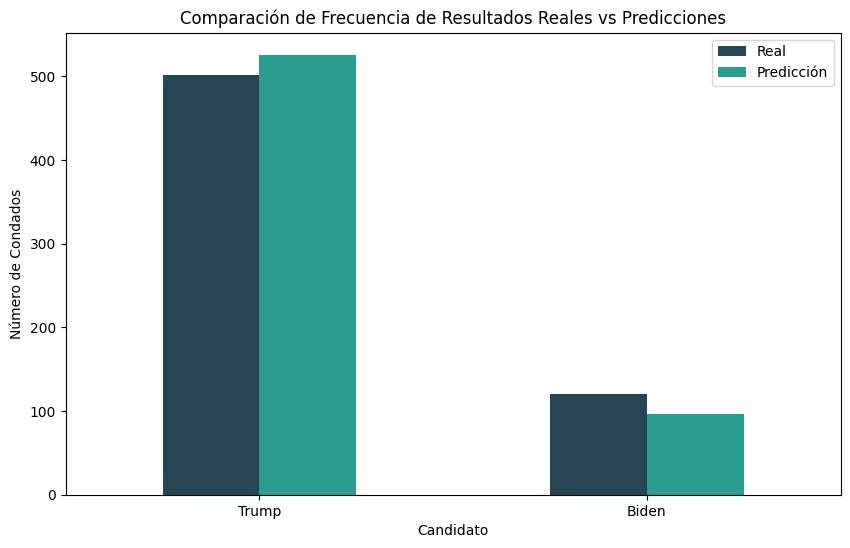

In [364]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con las frecuencias de los valores reales y las predicciones
real_counts = pd.Series(y_test).value_counts()
pred_counts = pd.Series(y_test_lr_pred).value_counts()

# Combinar los resultados en un DataFrame
comparison_df = pd.DataFrame({'Real': real_counts, 'Predicción': pred_counts})

# Crear un gráfico de barras
comparison_df.plot(kind='bar', figsize=(10, 6), color=['#264653', '#2a9d8f'])
plt.title("Comparación de Frecuencia de Resultados Reales vs Predicciones")
plt.xlabel("Candidato")
plt.ylabel("Número de Condados")
plt.xticks(rotation=0)
plt.show()


### Regresión

#### Dataset

In [365]:
columns_to_drop = ['Total_2020', 'Other_2020', 'Winner_2020', "Biden_2020"]  # Nombres de las columnas a eliminar
data_reg = data.drop(columns=columns_to_drop)
data_reg.head()

,Perc_Other_2020,Perc_Biden_2020,age_over_18_2019,age_over_65_2019,asian_2019,avg_family_size_2019,bachelors_2019,black_2019,hispanic_2019,households_speak_limited_english_2019,...,other_single_race_2019,pac_isl_2019,per_capita_income_2019,pop_2019,two_plus_races_2019,unemployment_rate_2019,uninsured_2019,veterans_2019,white_2019,white_not_hispanic_2019
0,0.015448,0.270184,76.2,15.0,1.0,3.09,26.6,19.0,2.8,0.7,...,0.7,0.0,29819,55380,2.2,3.5,7.1,12.6,76.8,74.6
1,0.014196,0.224090,78.3,20.0,0.9,3.24,31.9,9.3,4.6,1.2,...,1.1,0.0,32626,212830,1.7,4.0,8.9,11.8,86.2,83.1
2,0.007606,0.457882,79.1,18.6,0.5,3.01,11.6,47.6,4.4,1.6,...,3.6,0.0,18473,25361,1.2,9.4,11.3,6.6,46.8,45.8
3,0.008755,0.206983,79.4,15.9,0.1,3.74,10.4,22.3,2.6,0.6,...,0.0,0.0,20778,22493,0.6,7.0,10.7,8.0,76.8,74.5
4,0.008591,0.095694,76.8,17.9,0.4,3.33,13.1,1.6,9.3,1.8,...,0.9,0.0,24747,57681,1.6,3.1,10.8,7.7,95.5,86.9


#### Data Splitting

In [366]:
from sklearn.model_selection import train_test_split

# Quitar la columna objetivo ('Perc_Biden_2020') del conjunto de datos
X = data_reg.drop(columns=["Perc_Biden_2020"])  # Características (sin la columna objetivo)
y = data_reg["Perc_Biden_2020"]  # Columna objetivo

# Dividir los datos en 80% para train y 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Benchmark Model

#### Linear Regression

#### Random Forest

#### KNN